# Plot surface normals

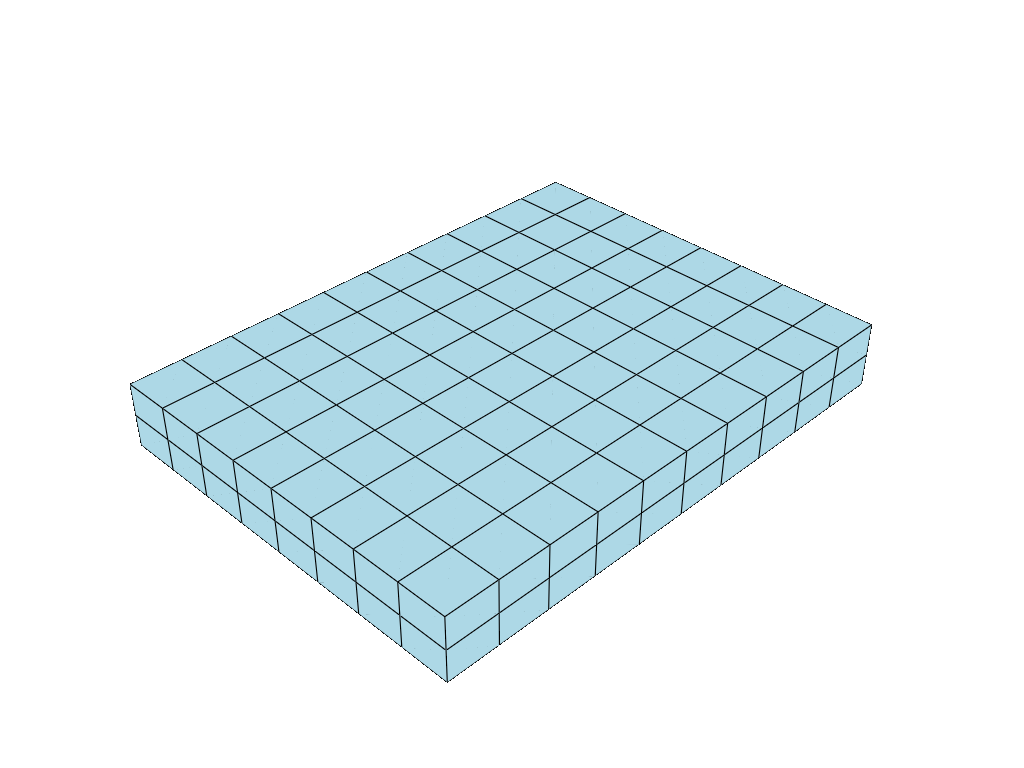

In [1]:
from sigmaepsilon.mesh.grid import gridH8 as grid
from sigmaepsilon.mesh import PolyData, PointData, CartesianFrame
from sigmaepsilon.mesh.cells import H8 as CellData

gridparams = {
    "size": (800, 600, 100),
    "shape": (10, 8, 2),
}
coords, topo = grid(**gridparams)

frame = CartesianFrame(dim=3)

pd = PointData(coords=coords, frame=frame)
cd = CellData(topo=topo, frames=frame)

mesh = PolyData(pd, cd)

mesh.plot(notebook=True, jupyter_backend="static", theme="document")

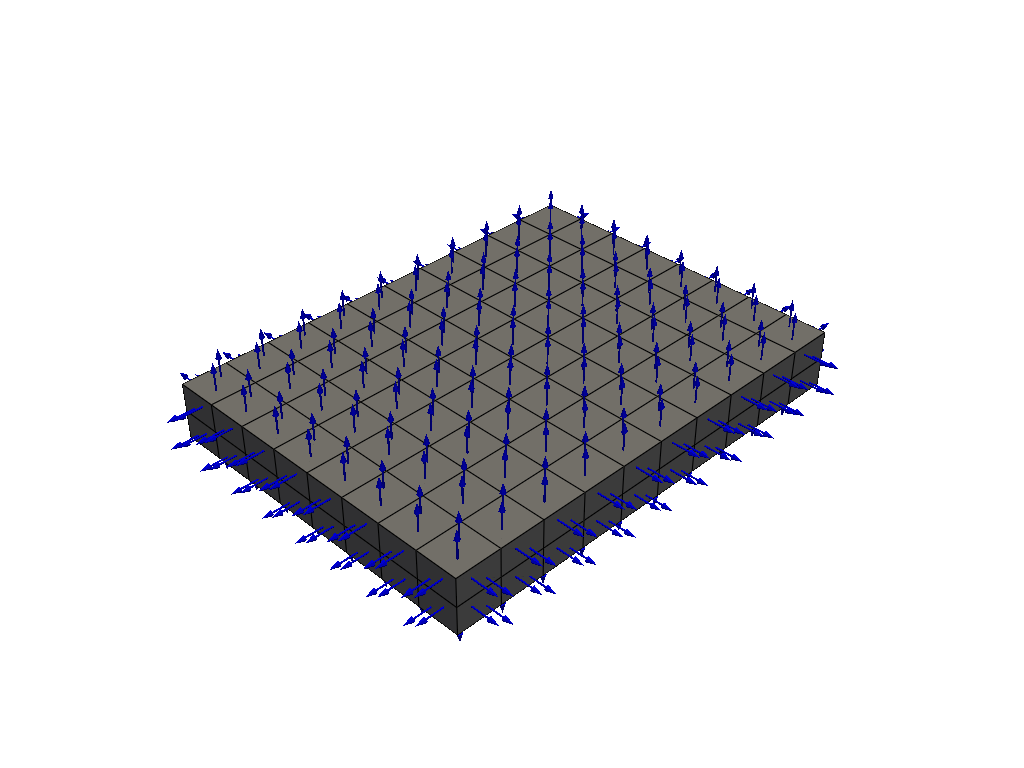

In [2]:
import pyvista as pv

plotter = pv.Plotter(notebook=True)

pvmesh = mesh.to_pv()[0]
plotter.add_mesh(pvmesh, color="grey", show_edges=True)

surface_normals = mesh.surface_normals()
surface_centers = mesh.surface().centers()
plotter.add_arrows(surface_centers, surface_normals, mag=50, color="blue")

plotter.show(jupyter_backend="static")